In [40]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
import plotly
import plotly.graph_objs as go

## Data Dictionary for data on Savings

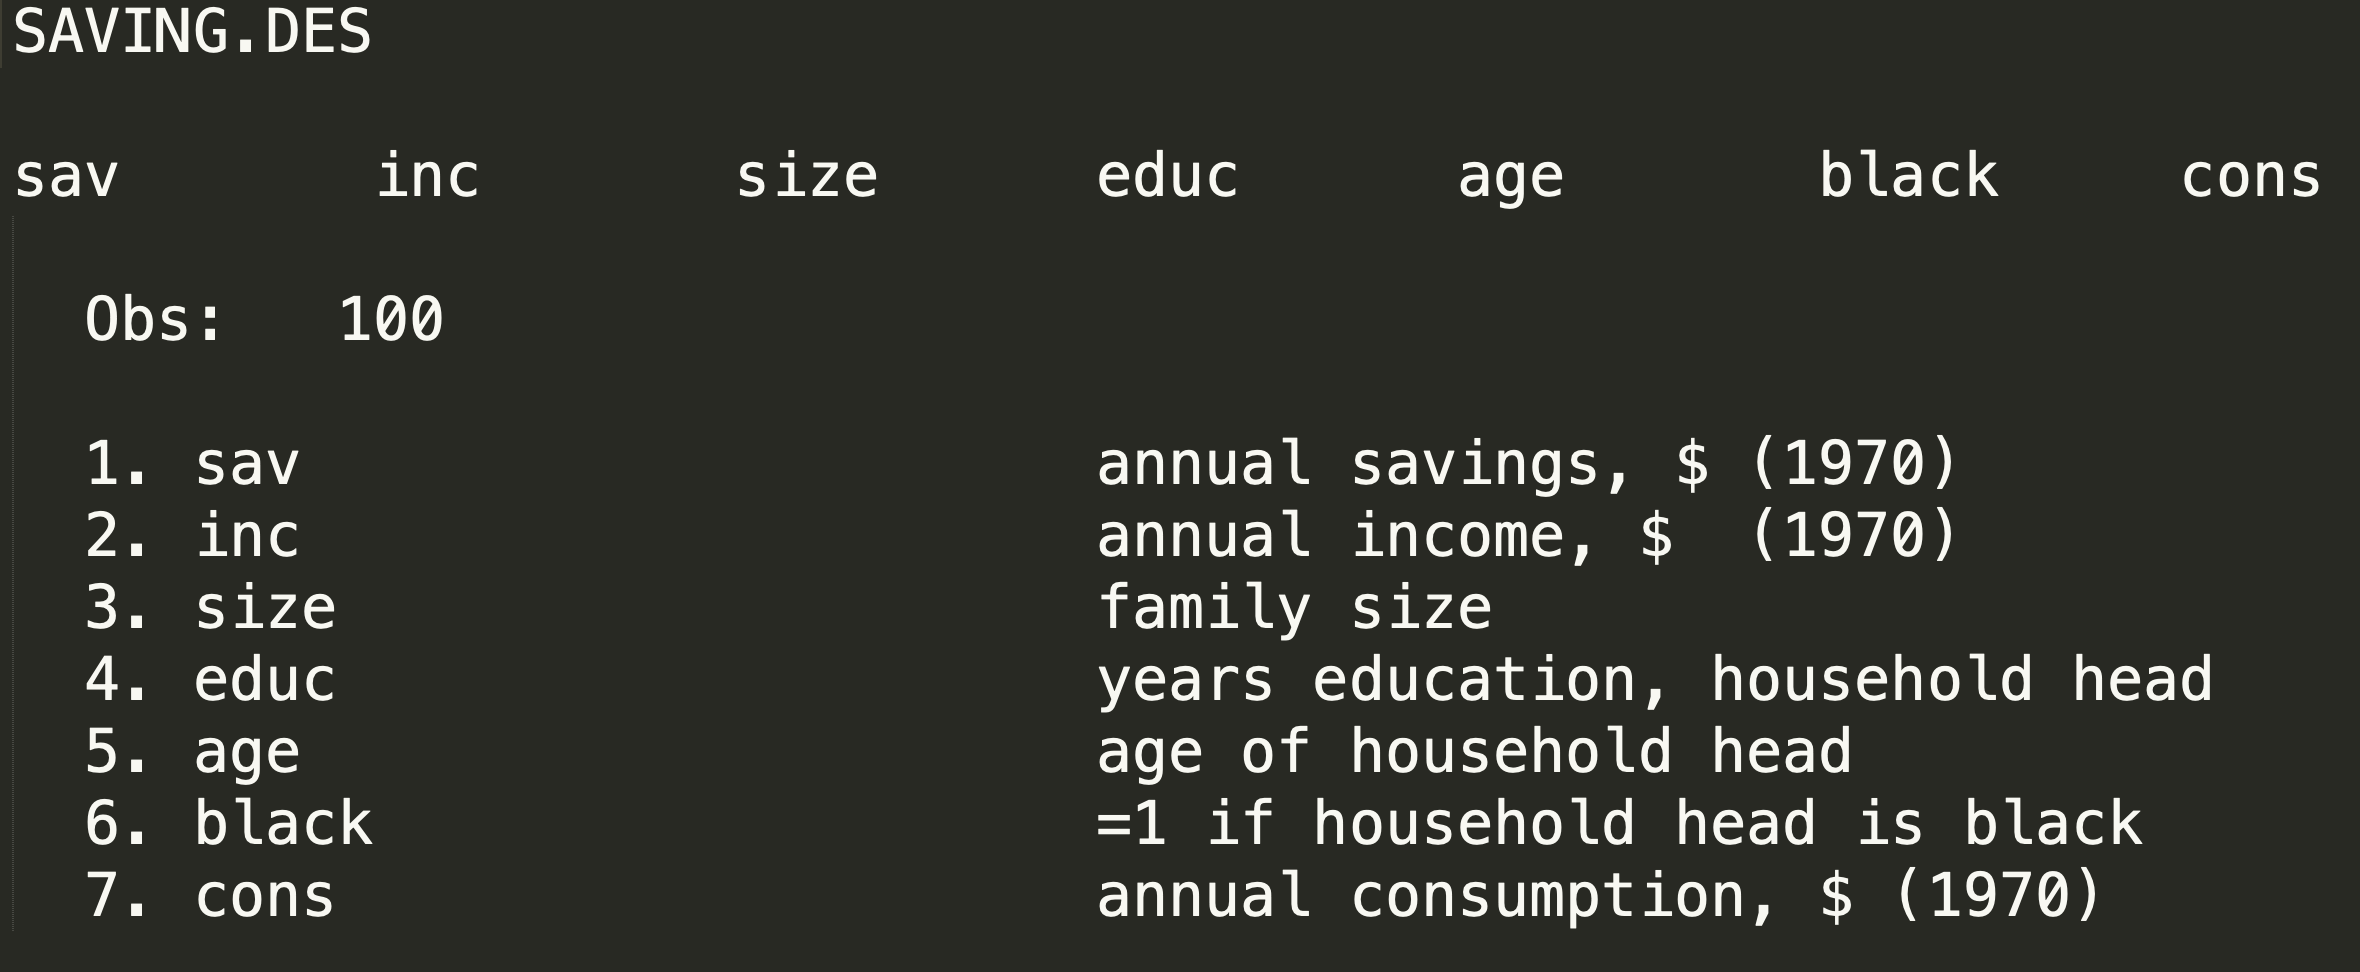

In [41]:
Image(filename='images/data_dictionary_savings.png')

In [42]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    elif xls_name == 'saving':
         names_dict = {0:'sav', 
                     1:'inc', 
                     2:'size',
                     3:'edu', 
                     4:'age', 
                     5:'black',
                     6:'cons', 
                      }
        
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    return df

df = rename_cols_and_save(xls_name='saving')

In [43]:
df.head()

,sav,inc,size,edu,age,black,cons
0,30,1920,4,2,40,1,1890
1,874,12403,4,9,33,0,11529
2,370,6396,2,17,31,0,6026
3,1200,7005,3,9,50,0,5805
4,275,6990,4,12,28,0,6715


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sav,100.0,1582.51,3284.902097,-5577.0,194.5,982.0,1834.75,25405.0
inc,100.0,9941.24,5583.998057,750.0,6510.0,8776.5,11903.00,32080.0
size,100.0,4.35,1.493251,2.0,3.0,4.0,5.00,10.0
edu,100.0,11.58,3.435348,2.0,9.0,12.0,13.00,20.0
age,100.0,38.77,7.398956,26.0,33.0,38.5,44.00,54.0
black,100.0,0.07,0.256432,0.0,0.0,0.0,0.00,1.0
cons,100.0,8358.73,5729.534802,-13055.0,5732.5,7561.5,9864.00,30280.0


## Distribution Plots

In [47]:

def dist_plot(df, var, sav_as):
    sns_plot = sns.distplot(df[var], color='b').get_figure()
    sns_plot.savefig("images/dist_plot_{0}.png".format(sav_as))
    return None

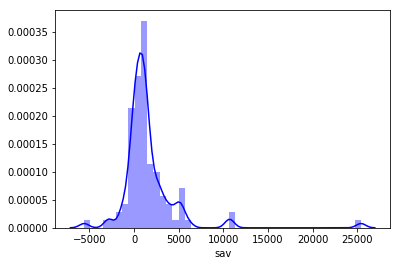

In [48]:
dist_plot(df=df, var='sav', sav_as='sav')

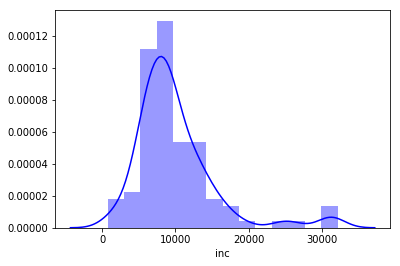

In [49]:
dist_plot(df=df, var='inc', sav_as='inc')

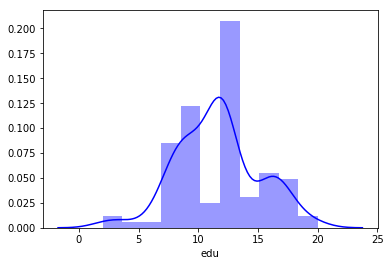

In [50]:
dist_plot(df=df, var='edu', sav_as='edu')

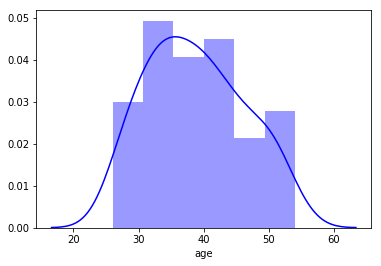

In [51]:
dist_plot(df=df, var='age', sav_as='age')

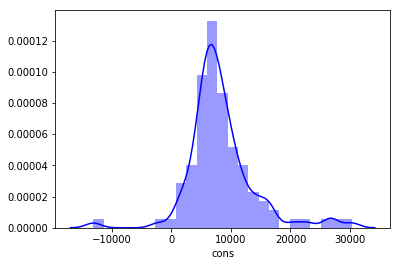

In [52]:
dist_plot(df=df, var='cons', sav_as='cons')

## Create 2d Scatterplots

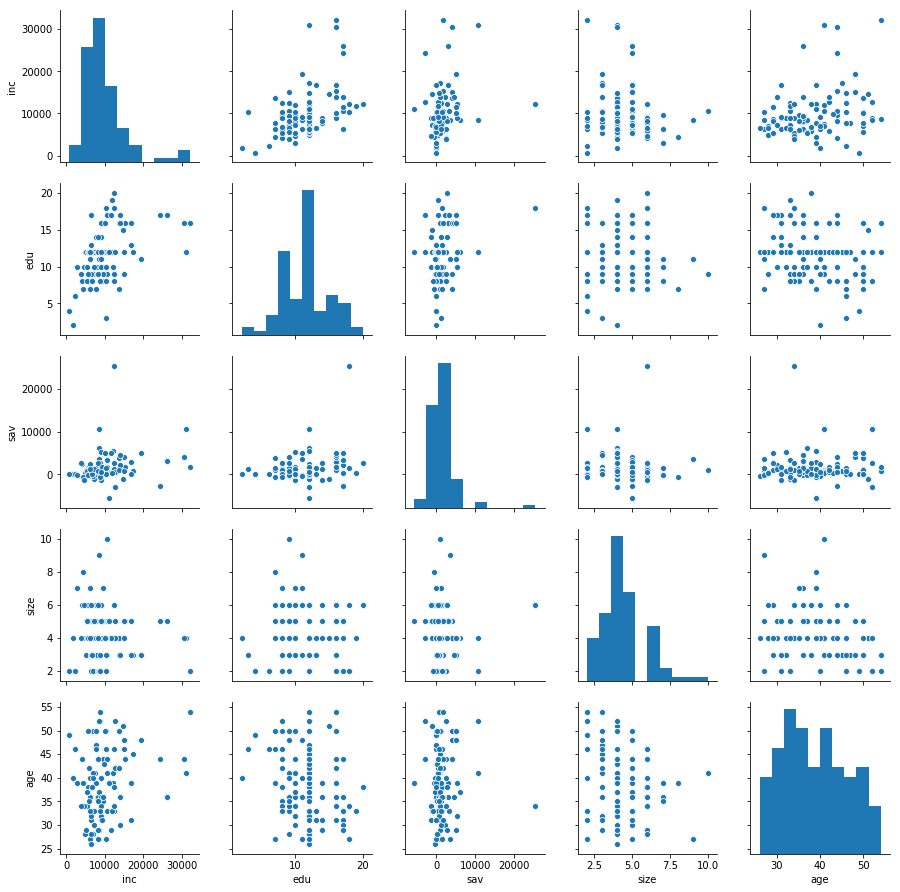

In [60]:
def create_scatter_matrix(df, list_of_vars, save_as):
    sns_plot = sns.pairplot(df[list_of_vars])
    sns_plot.savefig("images/scatter_matrix_{0}.png".format(save_as))
    return sns_plot
create_scatter_matrix(df=df, list_of_vars=['inc', 'edu', 'sav', 'size', 'age'], save_as='saving_income_education')

## Create Box Plots to Analyze Savings Rate

In [55]:
def box_plot(df, var_x, var_y):
    sns_plot = sns.boxplot(x=var_x, y=var_y, data=df).get_figure()
    sns_plot.savefig("images/box_plot_{0}_{1}.png".format(var_x,var_y))
    return None

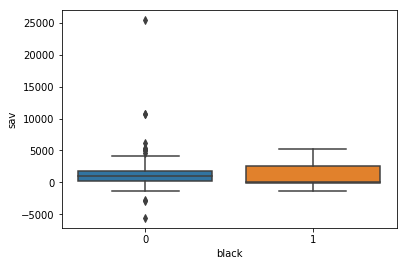

In [56]:
box_plot(df=df, var_x='black', var_y='sav')

## 3D Visualization of Drivers of Savings


In [57]:
def create_3d_plot(df, x, y, z):

    # Configure the trace.
    trace = go.Scatter3d(
        x=df[x],  # <-- Put your data instead
        y=df[y],  # <-- Put your data instead
        z=df[z],  # <-- Put your data instead
        mode='markers',
        marker={
            'size': 10,
            'opacity': 0.8,
        }
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    data = [trace]

    plot_figure = go.Figure(data=data, layout=layout)

    # Render the plot.
    return plotly.offline.iplot(plot_figure)

In [58]:
create_3d_plot(df=df, x='inc', y='edu', z='sav')

In [66]:
def regression_model(list_of_x, y, df):
    X = df[list_of_x]
    X = sm.add_constant(X)
    y = df[y]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    return model

model = regression_model(list_of_x=['edu', 'inc'], y='sav', df=df)

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sav   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4.238
Date:                Tue, 31 Mar 2020   Prob (F-statistic):             0.0172
Time:                        16:51:51   Log-Likelihood:                -946.91
No. Observations:                 100   AIC:                             1900.
Df Residuals:                      97   BIC:                             1908.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1150.2849   1127.471     -1.020      0.310   -3388.003    1087.433
edu          145.1295    104.664      1.387      0.169     -62.601     352.860
inc            0.1058      0.064      1.644      0.103      -0.022       0.234
==============================================================================
Omnibus:                      119.923   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3051.819
Skew:                           3.901   Prob(JB):                         0.00
Kurtosis:                      28.914   Cond. No.                     4.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model = regression_model(list_of_x=['inc', 'edu', 'size', 'age'], y='sav', df=df) 

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sav   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.100
Date:                Tue, 31 Mar 2020   Prob (F-statistic):             0.0868
Time:                        16:52:42   Log-Likelihood:                -946.86
No. Observations:                 100   AIC:                             1904.
Df Residuals:                      95   BIC:                             1917.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1401.1132   2770.993     -0.506      0.614   -6902.230    4100.003
inc            0.1086      0.071      1.528      0.130      -0.033       0.250
edu          142.6169    114.413      1.247      0.216     -84.522     369.756
size          65.1863    221.886      0.294      0.770    -375.313     505.685
age           -0.8014     49.734     -0.016      0.987     -99.535      97.933
==============================================================================
Omnibus:                      119.095   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2969.258
Skew:                           3.867   Prob(JB):                         0.00
Kurtosis:                      28.550   Cond. No.                     9.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
def scatter_with_line(df, x, y):
    sns_plot = sns.lmplot(x=x, y=y, data=df)
    sns_plot.savefig("images/scatter_with_line_{0}_{1}.png".format(x, y))
    return sns_plot

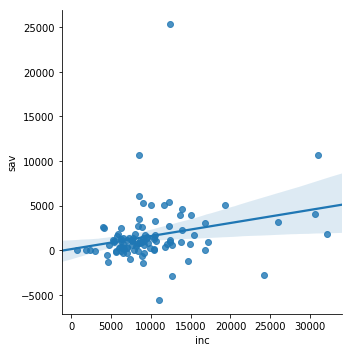

In [71]:
scatter_with_line(df=df, x='inc', y='sav')